#Awesome Indicator

Data: https://drive.google.com/file/d/1b5O4Yk_wLAKb3z2d10RQIq93EQblS5cK/view?usp=sharing

In [1]:
!pip install mplfinance
# Import the required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mplfinance.original_flavor import candlestick_ohlc
# Load the data
data = pd.read_csv("/content/reliance historical.csv")
df = pd.read_csv("/content/reliance historical.csv")
data.drop(['Deliverable Qty','% Dly Qt to Traded Qty','Total Traded Quantity','No. of Trades','Average Price','Turnover'],inplace = True, axis = 1)
df.drop(['Deliverable Qty','% Dly Qt to Traded Qty','Total Traded Quantity','No. of Trades','Average Price','Turnover'],inplace = True, axis = 1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
display(data.dtypes)

Symbol          object
Series          object
Date            object
Prev Close     float64
Open Price     float64
High Price     float64
Low Price      float64
Last Price     float64
Close Price    float64
dtype: object

In [3]:
#Checking any null values.
data.isna().sum()  

Symbol         0
Series         0
Date           0
Prev Close     0
Open Price     0
High Price     0
Low Price      0
Last Price     0
Close Price    0
dtype: int64

In [4]:
df.rename(columns = {'Date':'Date', 'Open Price':'Open',
       'High Price':'High',
       'Low Price':'Low', 'Close Price':'Close'}, inplace = True)

In [5]:
data.rename(columns = {'Date':'Date', 'Open Price':'Open',
       'High Price':'High',
       'Low Price':'Low', 'Close Price':'Close'}, inplace = True)

In [6]:
data.head(2)

,Symbol,Series,Date,Prev Close,Open,High,Low,Last Price,Close
0,RELIANCE,EQ,09-Dec-2020,1993.75,2009.95,2033.8,1999.25,2026.0,2026.95
1,RELIANCE,EQ,10-Dec-2020,2026.95,2021.60,2028.5,2001.00,2008.0,2007.00


#Line Chart

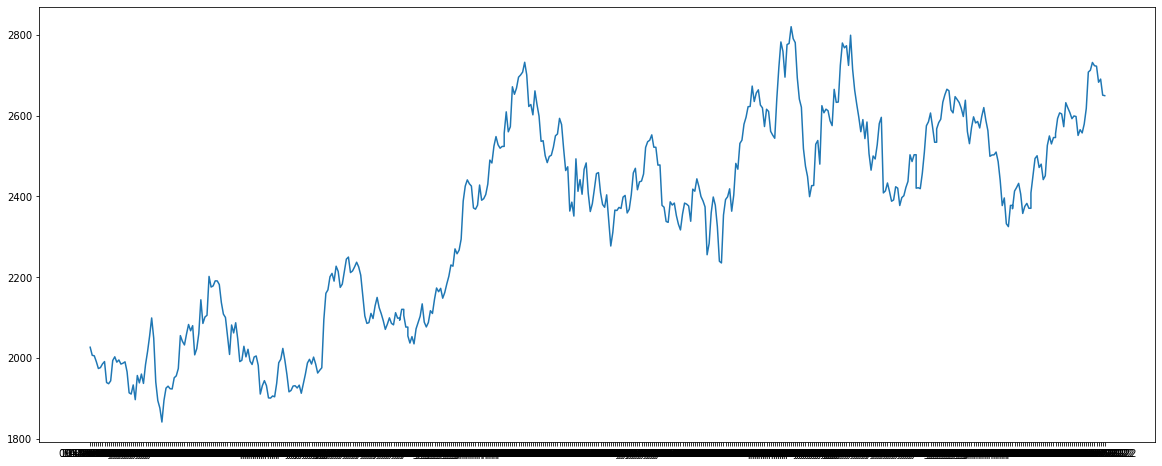

In [7]:
# Plot the line chart
# Set the size of the figure to 20 inches by 8 inches
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(data['Date'], data['Close'])
plt.show()

#Awesome Indicator

In [8]:
import mplfinance as mpf

To calculate the midpoint (H+L)/2 for each bar in the data we create a new column called mid in the DataFrame, and setting its values to the sum of the high and low columns divided by 2.

In [9]:
# Calculate the midpoint (H+L)/2 for each bar
df['mid'] = (df['High'] + df['Low'])/2

To calculate the simple moving averages for the 5- and 34-period windows we create new columns in the DataFrame called SMA5 and SMA34, and setting their values to the rolling average of the mid column, using a window size of 5 and 34 periods respectively.

In [10]:
# Calculate the simple moving averages for the 5- and 34-period windows
df['SMA5'] = df['mid'].rolling(5).mean()
df['SMA34'] = df['mid'].rolling(34).mean()

In [13]:
df["AO"] = df["SMA34"] - df["SMA5"]

To Calculate the Awesome Oscillator wecreate a new column called AO in the DataFrame, and setting its values to the difference between the SMA5 and SMA34 columns. This is the formula for the AO:

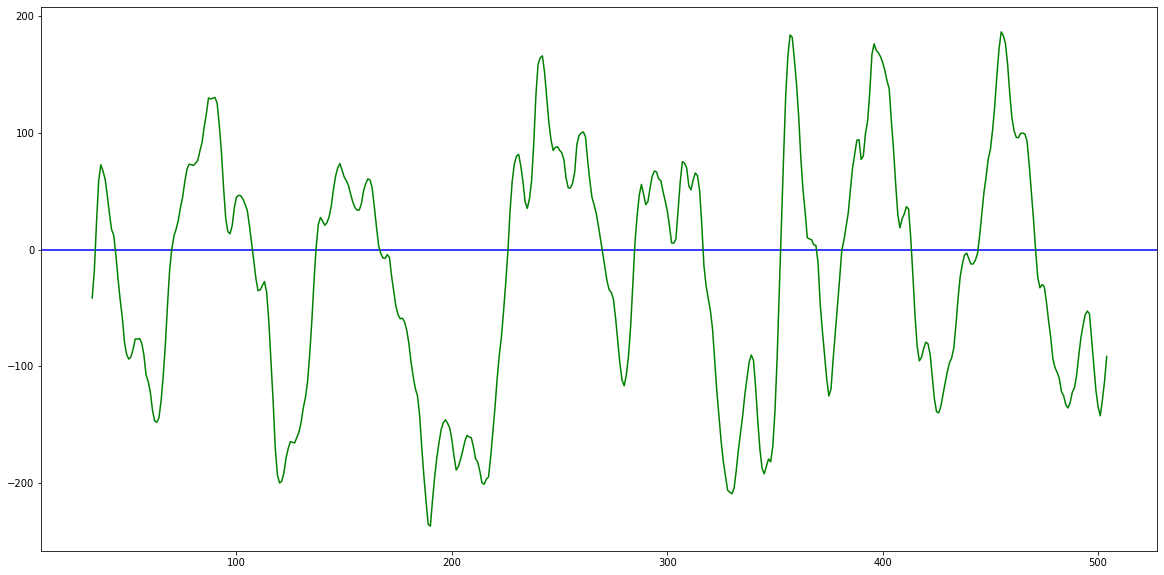

In [14]:
# Plot the Awesome Oscillator
fig, ax = plt.subplots(figsize=(20,10))

# Plot the zero line in blue
ax.axhline(y=0, color='blue')

# Plot the Awesome Oscillator  in green
ax.plot(df.index, df['AO'], color='green')

# Show the plot
plt.show()

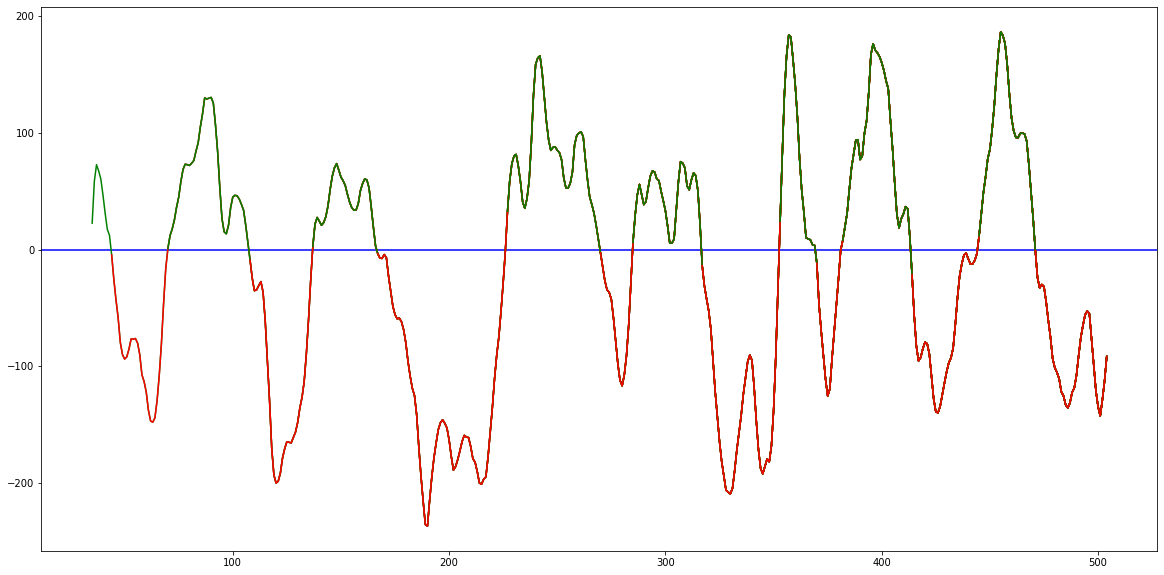

In [15]:
# Plot the Awesome Oscillator
fig, ax = plt.subplots(figsize=(20,10))

# Plot the zero line in blue
ax.axhline(y=0, color='blue')

# Plot the Awesome Oscillator in green when it is below the zero line and in red when it is above the zero line
for i in range(1, len(df)):
    if df.iloc[i]['AO'] > 0 and df.iloc[i-1]['AO'] < 0:
        ax.plot(df.index[i:], df['AO'][i:], color='green')
    elif df.iloc[i]['AO'] < 0 and df.iloc[i-1]['AO'] > 0:
        ax.plot(df.index[i:], df['AO'][i:], color='red')

# Show the plot
plt.show()

In [17]:
# Convert the Date column to a Datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Set the Date column as the index
df = df.set_index('Date')


1.n this code, the xaxis of the ax object is being set to use 
a FixedFormatter to display month names instead of numeric values. The FixedFormatter is being given a list of month names, which are derived from the index of the df DataFrame using the strftime() method. The %b format specifier is used to extract the abbreviated month name from the index values. Finally, the plt.show() method is called to display the plot.

2.The calendar library in Python is a built-in module that provides functions for working with dates and calendars. This library allows you to generate calendars, check if a year is a leap year, and more. It is typically used for tasks related to scheduling and time management. For example, you could use the calendar library to create a simple monthly calendar that you could print out or display in your application.

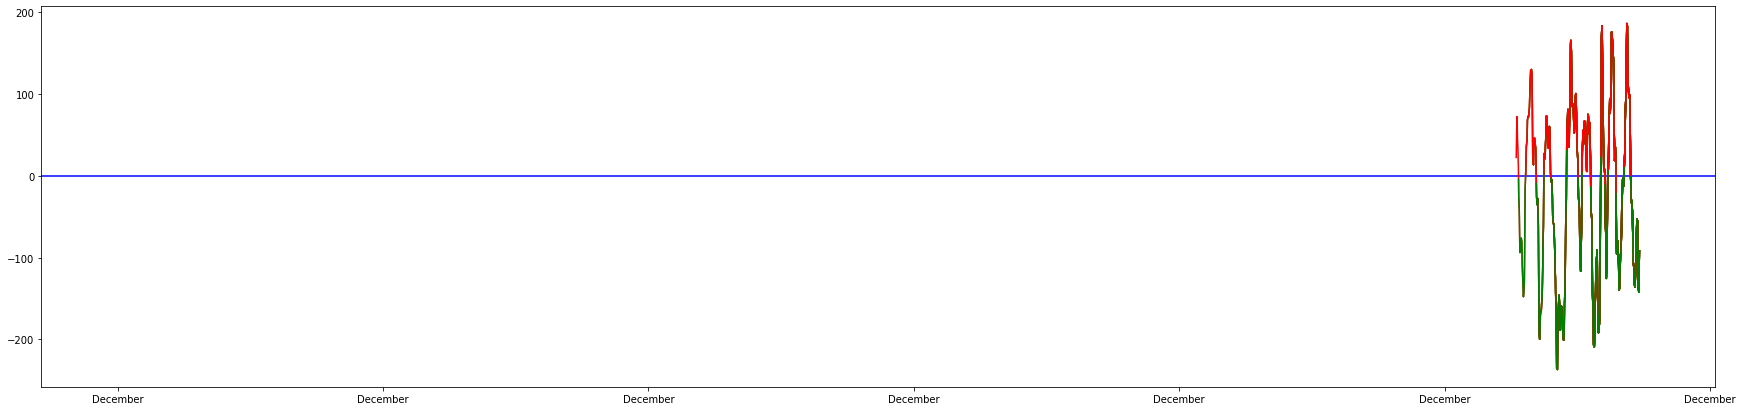

In [25]:
# Plot the Awesome Oscillator
fig, ax = plt.subplots(figsize=(30,7))

# Plot the zero line in blue
ax.axhline(y=0, color='blue')

'''import calendar

# Create a list of month names
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Set the x-axis to show month names instead of numeric values
ax.xaxis.set_major_formatter(plt.FixedFormatter(month_names))

# Show the plot
plt.show()'''

# Plot the Awesome Oscillator in green when it is below the zero line and in red when it is above the zero line
for i in range(1, len(df)):
    if df.iloc[i]['AO'] > 0 and df.iloc[i-1]['AO'] < 0:
        ax.plot(df.index[i:], df['AO'][i:], color='red')
    elif df.iloc[i]['AO'] < 0 and df.iloc[i-1]['AO'] > 0:
        ax.plot(df.index[i:], df['AO'][i:], color='green')

# Set the x-axis to show month names instead of numeric values
ax.xaxis.set_major_formatter(plt.FixedFormatter(df.index.strftime('%B')))

# Show the plot
plt.show()



The Awesome Oscillator (AO) is a momentum indicator that shows the difference between a 34-period and 5-period simple moving average (SMA) of the midpoint (H+L)/2. This indicator is used to identify bullish and bearish market momentum, and can also be used to identify possible trend reversals.

To use the Awesome Oscillator in trading, you can look for signals such as a bullish or bearish twin peak, a saucer, or a zero line cross. A bullish twin peak occurs when the AO forms two consecutive peaks above the zero line, indicating that the market is gaining upward momentum. A bearish twin peak occurs when the AO forms two consecutive peaks below the zero line, indicating that the market is gaining downward momentum. A saucer signal occurs when the AO forms three consecutive peaks, with the center peak being lower than the two outer peaks, indicating a possible reversal in the current trend. A zero line cross occurs when the AO crosses the zero line, indicating a possible trend change.

When trading based on the signals from the Awesome Oscillator, it is important to confirm the signals with other technical indicators and to consider the overall market conditions. It is also important to use appropriate risk management techniques to protect your trading account.